#Cifar 100


In [45]:
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Activation,Dropout,Flatten
from keras.datasets import cifar100
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import tensorflow as tf 


In [46]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='coarse')
X_train.shape

(50000, 32, 32, 3)

In [47]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (32*32*3, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(20, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               1573376   
                                                                 
 dense_14 (Dense)            (None, 256)               131328    
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 20)                1300      
                                                                 
Total params: 1,747,156
Trainable params: 1,747,156
Non-trainable params: 0
_________________________________________________________________


In [48]:
X_train = X_train.reshape((50000, 32*32*3))
X_train = X_train.astype('float32')/255.0

X_test = X_test.reshape(10000, 32*32*3)
X_test = X_test.astype('float32')/255.0

train_labels = to_categorical(y_train, 20)
test_labels = to_categorical(y_test, 20)

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size = 128)

Epoch 1/100
391/391 [==============================] - 20s 47ms/step - loss: 3.0238 - accuracy: 0.1633
Epoch 2/100
391/391 [==============================] - 17s 42ms/step - loss: 2.4515 - accuracy: 0.2387
Epoch 3/100
391/391 [==============================] - 17s 44ms/step - loss: 2.3633 - accuracy: 0.2688
Epoch 4/100
391/391 [==============================] - 18s 45ms/step - loss: 2.3106 - accuracy: 0.2840
Epoch 5/100
391/391 [==============================] - 21s 54ms/step - loss: 2.2677 - accuracy: 0.2971
Epoch 6/100
391/391 [==============================] - 16s 42ms/step - loss: 2.2345 - accuracy: 0.3085
Epoch 7/100
391/391 [==============================] - 17s 44ms/step - loss: 2.2053 - accuracy: 0.3171
Epoch 8/100
391/391 [==============================] - 20s 51ms/step - loss: 2.1780 - accuracy: 0.3257
Epoch 9/100
391/391 [==============================] - 17s 44ms/step - loss: 2.1567 - accuracy: 0.3318
Epoch 10/100
391/391 [==============================] - 17s 44ms/step - l

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Loss: ', test_loss)
print('Accuracy: ', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 2.3436 - accuracy: 0.3594
Loss:  2.3435516357421875
Accuracy:  0.3594000041484833


1/1 [==============================] - 0s 152ms/step
4


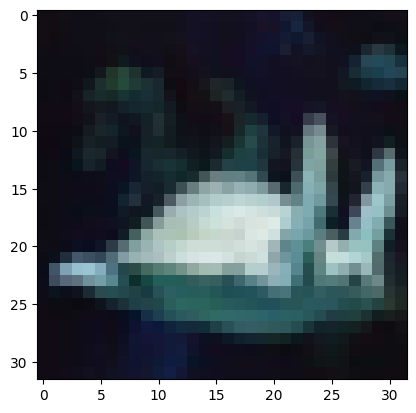

In [17]:
X_pred = X[33].reshape(1,32*32*3) 
X_pred = X_pred.astype('float32')/255.0
y_pred = model.predict(X_pred)
print(np.argmax(y_pred))

plt.imshow(X[33], cmap='gray')
plt.show()


#Fashion Mnist

In [57]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.models import load_model

In [58]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_test.shape

(10000, 28, 28)

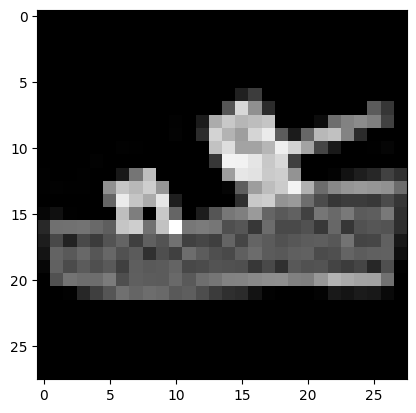

In [59]:
plt.imshow(X_train[12], cmap='gray', interpolation=None)
plt.show()

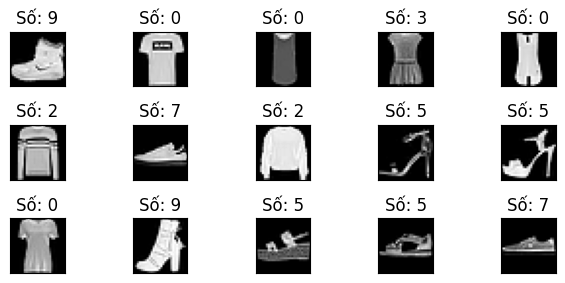

In [60]:

for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation=None)
    plt.title('Số: {}'.format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [61]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (28*28, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [62]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32')/255.0

X_test = X_test.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255.0

train_labels = to_categorical(y_train, 10)
test_labels = to_categorical(y_test, 10)

In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size = 128)

Epoch 1/50
391/391 [==============================] - 19s 45ms/step - loss: 2.6813 - accuracy: 0.1692
Epoch 2/50
391/391 [==============================] - 18s 45ms/step - loss: 2.4535 - accuracy: 0.2417
Epoch 3/50
391/391 [==============================] - 27s 69ms/step - loss: 2.3539 - accuracy: 0.2760
Epoch 4/50
391/391 [==============================] - 18s 47ms/step - loss: 2.2832 - accuracy: 0.2947
Epoch 5/50
391/391 [==============================] - 17s 44ms/step - loss: 2.2263 - accuracy: 0.3129
Epoch 6/50
391/391 [==============================] - 17s 44ms/step - loss: 2.1803 - accuracy: 0.3291
Epoch 7/50
391/391 [==============================] - 19s 47ms/step - loss: 2.1376 - accuracy: 0.3400
Epoch 8/50
391/391 [==============================] - 17s 44ms/step - loss: 2.1004 - accuracy: 0.3498
Epoch 9/50
391/391 [==============================] - 18s 46ms/step - loss: 2.0718 - accuracy: 0.3607
Epoch 10/50
391/391 [==============================] - 18s 46ms/step - loss: 2.036

1/1 [==============================] - 0s 70ms/step
8


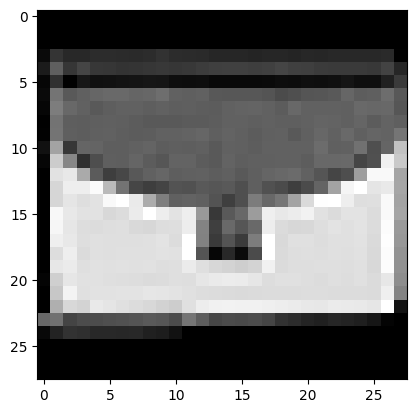

In [65]:
X_pred = X[67].reshape(1,28*28) 
X_pred = X_pred.astype('float32')/255.0
y_pred = model.predict(X_pred)
print(np.argmax(y_pred))

plt.imshow(X[78], cmap='gray')
plt.show()
     